In [1]:
import pandas as pd
import pickle
from BayDS.lib.training import *
from sklearn.model_selection import GroupKFold, KFold

In [2]:
data = pd.read_pickle("temp/data.pkl")

In [25]:
tdata = pd.read_pickle("temp/data_with_temporal.pkl")

In [30]:
tdata.index

Int64Index([1000000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006,
            1000007, 1000008, 1000009,
            ...
             455001,  455002,  455003,  455004,  455005,  455006,  455007,
             455008,  455009,  455010],
           dtype='int64', name='orderid', length=651067)

In [3]:
data

,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,...,field27_count_groupby_field29,userid_count_groupby_field29,field5_count_groupby_userid,field7_count_groupby_userid,field8_count_groupby_userid,field10_count_groupby_userid,field12_count_groupby_userid,field26_count_groupby_userid,field27_count_groupby_userid,field29_count_groupby_userid
orderid,,,,,,,,,,,,,,,,,,,,,
1000000,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508119430350,11,12,1,1,0,1,1,...,154699,1,1,1,1,1,1,1,1,1
1000001,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794036775907,5,7,2,0,0,2,1,...,83311,1,1,2,2,2,1,1,1,1
1000002,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548936758545536,2,3,2,0,0,1,1,...,2162,1,1,2,2,1,1,2,2,1
1000003,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651315006278,10,11,1,1,3,2,1,...,154699,1,1,1,3,2,1,2,2,1
1000004,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079480315165,8,11,1,1,0,1,1,...,199779,1,1,1,1,1,1,1,1,1
1000005,bd2f85e3ed0cfa6ce641f632e4cfa35e170336ec5408cb...,0,-0.316222675891093,9,9,1,1,0,1,1,...,199779,2,1,3,2,3,1,2,3,2
1000006,6c6610f18ccd71f5ce664f9a840883d5d4b790d3adb88f...,0,0.071634128532980,10,10,1,1,0,1,1,...,154699,1,1,1,1,1,1,1,1,1
1000007,daa23cdeee4840e522def77d76c05e4c9a1b64980d0aaa...,0,-0.238651315006278,10,11,1,1,1,1,1,...,7504,1,1,1,1,1,1,1,1,1
1000008,c58f19409e035aafe7fd70b684ccd917402912c10b8a81...,0,-0.005937232351835,8,8,1,1,0,1,1,...,199779,2,1,2,2,2,1,2,2,2


In [8]:
data['order_till_hour'] = data['field21'].astype(str)+'_'+data['field2'].astype(str)+'_'+data['field18'].astype(str)+'_'+data['field11'].astype(str)
data['order_till_weekday'] = data['field21'].astype(str)+'_'+data['field2'].astype(str)+'_'+data['field18'].astype(str)
data['order_till_month'] = data['field21'].astype(str)+'_'+data['field2'].astype(str)

In [33]:
data=data.join(tdata)

In [20]:
use_columns = pickle.load(open('./temp/rfe_columns.pkl','rb'))

In [34]:
use_columns = set(use_columns) | set(tdata.columns)

In [35]:
exclude_features_from_training = ['indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25', 'goal21', 'goal22', 'goal23',
       'goal24', 'goal25', 'goal1','userid',]

In [36]:
X = data[data['goal1']>=0].drop(['goal1'], axis=1)
y = data[data['goal1']>=0]['goal1']
test=data[data['goal1']<0]
train_features = [f for f in use_columns if f not in exclude_features_from_training]

In [37]:
results = {}

Fold 1 started at Thu Dec 19 21:11:14 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.906753	training's auc: 0.906753	valid_1's auc: 0.676837	valid_1's auc: 0.676837
Early stopping, best iteration is:
[42]	training's auc: 0.827631	training's auc: 0.827631	valid_1's auc: 0.68013	valid_1's auc: 0.680127
Fold 2 started at Thu Dec 19 21:12:05 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.903815	training's auc: 0.903815	valid_1's auc: 0.720904	valid_1's auc: 0.720904
[200]	training's auc: 0.952454	training's auc: 0.952454	valid_1's auc: 0.721261	valid_1's auc: 0.721261
Early stopping, best iteration is:
[132]	training's auc: 0.924452	training's auc: 0.924452	valid_1's auc: 0.722992	valid_1's auc: 0.722992
Fold 3 started at Thu Dec 19 21:13:08 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.904017	training's auc: 0.904017	valid_1's auc: 0.696475	valid_1's auc:

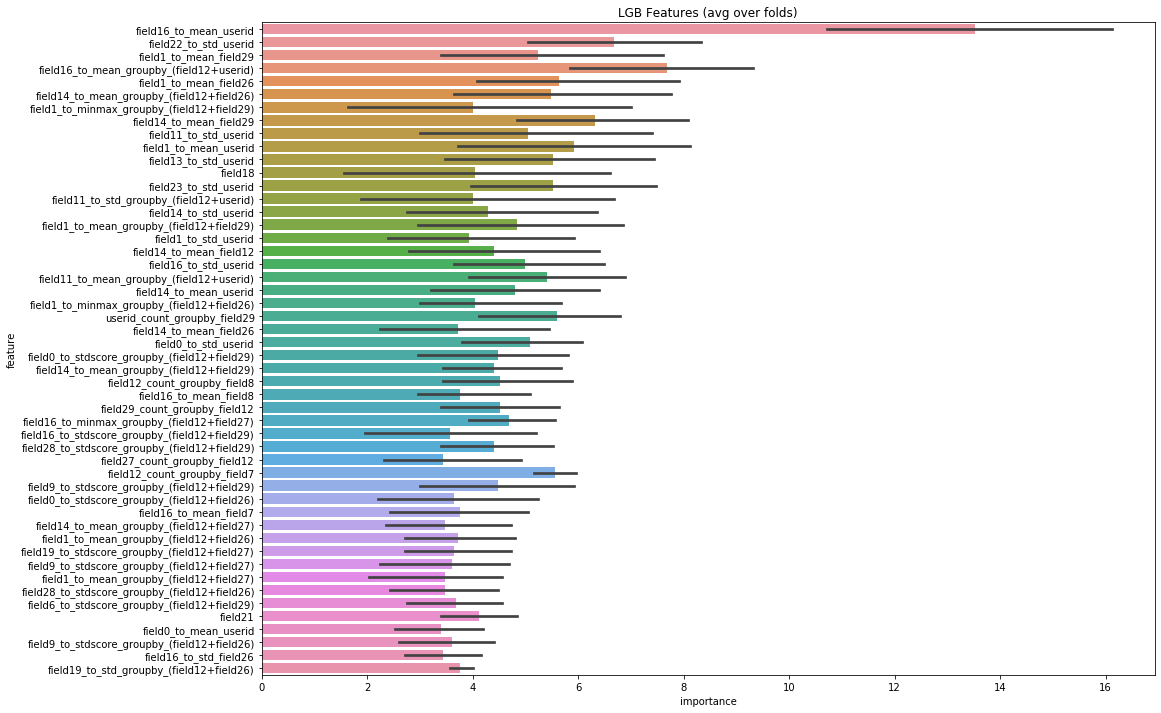

In [38]:
import datetime

NFOLDS = 5
folds = GroupKFold(n_splits=NFOLDS)


params = {
          'objective': 'binary',
          "metric": 'auc',
          "verbosity": -1,
          'random_state':0,
        'learning_rate':0.05, 
        'max_depth': 20,
        'num_leaves': 50
         }
train_options = {
        "model_type":'lgb',
        "params": params,
        "eval_metric":'auc',
        'early_stopping_rounds': 100,
        'n_estimators': 500,
        'averaging': 'rank',
        'use_groups': False,
        'fold_name': folds.__class__.__name__,
        'n_splits': NFOLDS,

    }


result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=train_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             groups=X['userid'],
                                             n_jobs=-1)

In [40]:
# results[max_depth] = result_dict
# pickle.dump(results, open('temp/max_depth.pkl','wb'))

t = datetime.datetime.now().strftime("%m-%d-%H-%M")
test['proba'] = result_dict['prediction']
sub = pd.read_csv('data/onetwotrip_challenge_sub1.csv')
sub['proba'] = test['proba'] / test['proba'].max()
sub.reset_index(drop=True).set_index('orderid').to_csv(f'temp/submission_rfe-{t}.csv')

In [12]:
CV mean score: 0.6925, std: 0.0178.
sub.reset_index(drop=True).set_index('orderid').to_csv(f'temp/submission_depth={max_depth}-{t}.csv')

In [21]:
for k,v in results.items():
    print (k, v['scores'])

0 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
1 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
2 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
3 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
4 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
5 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
6 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
7 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
8 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.6805495522257086, 0.6833038734198107]
9 [0.6764080531918433, 0.7253302297489943, 0.7011452480307342, 0.68054955